# **Recommender System**

The purpose of a recommender system is to leverage data and algorithms to provide personalized recommendations to users. It aims to enhance the user experience, increase engagement and sales, and help users discover items that match their preferences and interests.

Recommender systems are utilized in various industries and play a crucial role in providing tailored suggestions based on user behavior, preferences, and other relevant factors.

By leveraging user data and applying algorithms, these systems facilitate personalized discovery and contribute to a more satisfying and engaging user experience.


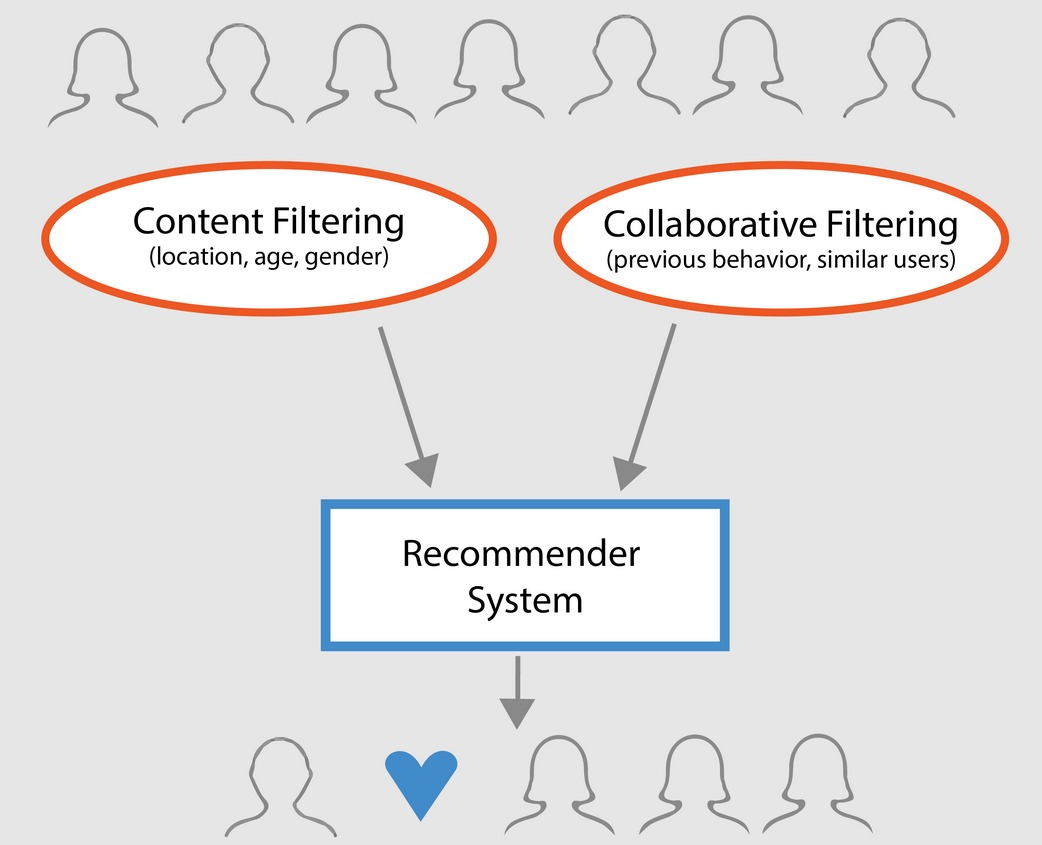

In [70]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None) #to see all the colums


from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import  WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel


import warnings
warnings.filterwarnings('ignore')

In [2]:
movies = pd.read_csv(r"/content/movies.csv")
credits = pd.read_csv(r"/content/credits.csv")

# **Data Understanding And Cleaning**

In [3]:
movies.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   10-12-2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   19-05-2007   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   26-10-2015   880674609   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title  vote_average  vote_count  
0                                    Avatar           7.2       11800  
1  Pirates of the Caribbean: At World's End           6.9        4500  
2                                   Spectre           6.3        4466

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [5]:
credits.head(3)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...

In [6]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [7]:
#since the credit data contains the movie title and some other importatiformation, we need to merge both data together
data = movies.merge(credits, on = 'title')

In [8]:
#trying to know the data shape
data.shape

(4808, 23)

In [9]:
#checking outthe merged data
data.head(3)

budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   

                                            overview  popularity  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577   
1  Captain Barbossa, long believed to be dead, ha...  139.082615   
2  A cryptic message from Bond’s past sends him o...  107.376788   

                                production_companies  \
0  [{"name": "Ingenious Film Partners", "id": 289...   
1  [{"name": "Walt Disney Pictures", "id": 2}, {"...   
2  [{"name": "Columbia Pictures", "id": 5}, {"nam...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   10-12-2009  2787965087   
1  [{"iso_3166_1": "US", "name": "United States o...   19-05-2007   961000000   
2  [{"iso_3166_1": "GB", "name": "United Kingdom"...   26-10-2015   880674609   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1    169.0           [{"iso_639_1": "en", "name": "English"}]  Released   
2    148.0  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   

                                      title  vote_average  vote_count  \
0                                    Avatar           7.2       11800   
1  Pirates of the Caribbean: At World's End           6.9        4500   
2                                   Spectre           6.3        4466   

   movie_id                                               cast  \
0     19995  [{"cast_id": 242, "character": "Jake Sully", "...   
1       285  [{"cast_id": 4, "character": "Captain Jack Spa...   
2    206647  [{"cast_id": 1, "character": "James Bond", "cr...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...

In [10]:
data["original_language"].unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'ko', 'de', 'hi', 'ru', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 0 to 4807
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4808 non-null   int64  
 1   genres                4808 non-null   object 
 2   homepage              1713 non-null   object 
 3   id                    4808 non-null   int64  
 4   keywords              4808 non-null   object 
 5   original_language     4808 non-null   object 
 6   original_title        4808 non-null   object 
 7   overview              4805 non-null   object 
 8   popularity            4808 non-null   float64
 9   production_companies  4808 non-null   object 
 10  production_countries  4808 non-null   object 
 11  release_date          4807 non-null   object 
 12  revenue               4808 non-null   int64  
 13  runtime               4806 non-null   float64
 14  spoken_languages      4808 non-null   object 
 15  status               

In [12]:
#we want to select the columns we are working on
data_N = data[["movie_id", "title", "overview", "genres", "keywords", "cast", "crew"]]

In [13]:
#checking out the new data
data_N.head(5)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                              genres  \
0  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                            keywords  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...   
2  [{"id": 470, "name": "spy"}, {"id": 818, "name...   
3  [{"id": 849, "name": "dc comics"}, {"id": 853,...   
4  [{"id": 818, "name": "based on novel"}, {"id":...   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [14]:
data_N.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4808 entries, 0 to 4807
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4808 non-null   int64 
 1   title     4808 non-null   object
 2   overview  4805 non-null   object
 3   genres    4808 non-null   object
 4   keywords  4808 non-null   object
 5   cast      4808 non-null   object
 6   crew      4808 non-null   object
dtypes: int64(1), object(6)
memory usage: 300.5+ KB


In [15]:
#we need to check how many missing values are in the dataset
data_N.isna().sum()

movie_id    0
title       0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [16]:
#since we dont have much missing values, we can drop it
data_N.dropna(inplace= True)

In [17]:
#we need to check for duplicates
data_N.duplicated().sum()

0

In [18]:
data_N.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [19]:
#importing AST(ABstract Syntax Tree) is the tree
import ast

In [20]:
#this is a function to extract the name part of the generes column
def extract_name(obj):
    L =[]
    for i in ast.literal_eval(obj):
      L.append(i["name"])
    return L


In [21]:
data_N["genres"] = data_N["genres"].apply(extract_name)
data_N["keywords"] = data_N["keywords"].apply(extract_name)

In [22]:
data_N.head(5)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   
2  A cryptic message from Bond’s past sends him o...   
3  Following the death of District Attorney Harve...   
4  John Carter is a war-weary, former military ca...   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   
2                     [Action, Adventure, Crime]   
3               [Action, Crime, Drama, Thriller]   
4           [Action, Adventure, Science Fiction]   

                                            keywords  \
0  [culture clash, future, space war, space colon...   
1  [ocean, drug abuse, exotic island, east india ...   
2  [spy, based on novel, secret agent, sequel, mi...   
3  [dc comics, crime fighter, terrorist, secret i...   
4  [based on novel, mars, medallion, space travel...   

                                                cast  \
0  [{"cast_id": 242, "character": "Jake Sully", "...   
1  [{"cast_id": 4, "character": "Captain Jack Spa...   
2  [{"cast_id": 1, "character": "James Bond", "cr...   
3  [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
4  [{"cast_id": 5, "character": "John Carter", "c...   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...  
2  [{"credit_id": "54805967c3a36829b5002c41", "de...  
3  [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
4  [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [23]:
data_N["genres"].iloc[0]

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [24]:
data_N["keywords"].iloc[0]

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d']

In [25]:
data_N["cast"].iloc[0]

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [26]:
data_N["crew"].iloc[0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [27]:
def extract_cast(obj):
  L = []
  counter = 0
  for i in  ast.literal_eval(obj):
    if counter != 3:
      L.append(i["name"])
      counter += 1
    else:
      break
    return L

In [28]:
data_N["cast"] = data_N["cast"].apply(extract_cast)

In [29]:
data_N.head(2)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   

                                            overview  \
0  In the 22nd century, a paraplegic Marine is di...   
1  Captain Barbossa, long believed to be dead, ha...   

                                          genres  \
0  [Action, Adventure, Fantasy, Science Fiction]   
1                   [Adventure, Fantasy, Action]   

                                            keywords               cast  \
0  [culture clash, future, space war, space colon...  [Sam Worthington]   
1  [ocean, drug abuse, exotic island, east india ...      [Johnny Depp]   

                                                crew  
0  [{"credit_id": "52fe48009251416c750aca23", "de...  
1  [{"credit_id": "52fe4232c3a36847f800b579", "de...

In [30]:
def fetch_director(obj):
  L= []
  for i in ast.literal_eval(obj):
    if i["job"] == "Director":
      L.append(i["name"])
      break
  return L

In [31]:
data_N["crew"] = data_N["crew"].apply(fetch_director)

In [32]:
data_N

movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4803      9367                               El Mariachi   
4804     72766                                 Newlyweds   
4805    231617                 Signed, Sealed, Delivered   
4806    126186                          Shanghai Calling   
4807     25975                         My Date with Drew   

                                               overview  \
0     In the 22nd century, a paraplegic Marine is di...   
1     Captain Barbossa, long believed to be dead, ha...   
2     A cryptic message from Bond’s past sends him o...   
3     Following the death of District Attorney Harve...   
4     John Carter is a war-weary, former military ca...   
...                                                 ...   
4803  El Mariachi just wants to play his guitar and ...   
4804  A newlywed couple's honeymoon is upended by th...   
4805  "Signed, Sealed, Delivered" introduces a dedic...   
4806  When ambitious New York attorney Sam is sent t...   
4807  Ever since the second grade when he first saw ...   

                                             genres  \
0     [Action, Adventure, Fantasy, Science Fiction]   
1                      [Adventure, Fantasy, Action]   
2                        [Action, Adventure, Crime]   
3                  [Action, Crime, Drama, Thriller]   
4              [Action, Adventure, Science Fiction]   
...                                             ...   
4803                      [Action, Crime, Thriller]   
4804                              [Comedy, Romance]   
4805             [Comedy, Drama, Romance, TV Movie]   
4806                                             []   
4807                                  [Documentary]   

                                               keywords               cast  \
0     [culture clash, future, space war, space colon...  [Sam Worthington]   
1     [ocean, drug abuse, exotic island, east india ...      [Johnny Depp]   
2     [spy, based on novel, secret agent, sequel, mi...     [Daniel Craig]   
3     [dc comics, crime fighter, terrorist, secret i...   [Christian Bale]   
4     [based on novel, mars, medallion, space travel...    [Taylor Kitsch]   
...                                                 ...                ...   
4803  [united states–mexico barrier, legs, arms, pap...  [Carlos Gallardo]   
4804                                                 []     [Edward Burns]   
4805  [date, love at first sight, narration, investi...      [Eric Mabius]   
4806                                                 []    [Daniel Henney]   
4807          [obsession, camcorder, crush, dream girl]   [Drew Barrymore]   

                     crew  
0         [James Cameron]  
1        [Gore Verbinski]  
2            [Sam Mendes]  
3     [Christopher Nolan]  
4        [Andrew Stanton]  
...                   ...  
4803   [Robert Rodriguez]  
4804       [Edward Burns]  
4805        [Scott Smith]  
4806        [Daniel Hsia]  
4807   [Brian Herzlinger]  

[4805 rows x 7 columns]

In [33]:
data_N["overview"][0]

'In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.'

In [37]:
#Comiig all the colums into one by creating the tag column

data_N["tags"] = (
    data_N["overview"].astype(str) +
    data_N["genres"].astype(str) +
    data_N["keywords"].astype(str) +
    data_N["cast"].astype(str) +
    data_N["crew"].astype(str)
)

data_N

movie_id                                     title  \
0        19995                                    Avatar   
1          285  Pirates of the Caribbean: At World's End   
2       206647                                   Spectre   
3        49026                     The Dark Knight Rises   
4        49529                               John Carter   
...        ...                                       ...   
4803      9367                               El Mariachi   
4804     72766                                 Newlyweds   
4805    231617                 Signed, Sealed, Delivered   
4806    126186                          Shanghai Calling   
4807     25975                         My Date with Drew   

                                               overview  \
0     In the 22nd century, a paraplegic Marine is di...   
1     Captain Barbossa, long believed to be dead, ha...   
2     A cryptic message from Bond’s past sends him o...   
3     Following the death of District Attorney Harve...   
4     John Carter is a war-weary, former military ca...   
...                                                 ...   
4803  El Mariachi just wants to play his guitar and ...   
4804  A newlywed couple's honeymoon is upended by th...   
4805  "Signed, Sealed, Delivered" introduces a dedic...   
4806  When ambitious New York attorney Sam is sent t...   
4807  Ever since the second grade when he first saw ...   

                                             genres  \
0     [Action, Adventure, Fantasy, Science Fiction]   
1                      [Adventure, Fantasy, Action]   
2                        [Action, Adventure, Crime]   
3                  [Action, Crime, Drama, Thriller]   
4              [Action, Adventure, Science Fiction]   
...                                             ...   
4803                      [Action, Crime, Thriller]   
4804                              [Comedy, Romance]   
4805             [Comedy, Drama, Romance, TV Movie]   
4806                                             []   
4807                                  [Documentary]   

                                               keywords               cast  \
0     [culture clash, future, space war, space colon...  [Sam Worthington]   
1     [ocean, drug abuse, exotic island, east india ...      [Johnny Depp]   
2     [spy, based on novel, secret agent, sequel, mi...     [Daniel Craig]   
3     [dc comics, crime fighter, terrorist, secret i...   [Christian Bale]   
4     [based on novel, mars, medallion, space travel...    [Taylor Kitsch]   
...                                                 ...                ...   
4803  [united states–mexico barrier, legs, arms, pap...  [Carlos Gallardo]   
4804                                                 []     [Edward Burns]   
4805  [date, love at first sight, narration, investi...      [Eric Mabius]   
4806                                                 []    [Daniel Henney]   
4807          [obsession, camcorder, crush, dream girl]   [Drew Barrymore]   

                     crew                                               tags  
0         [James Cameron]  In the 22nd century, a paraplegic Marine is di...  
1        [Gore Verbinski]  Captain Barbossa, long believed to be dead, ha...  
2            [Sam Mendes]  A cryptic message from Bond’s past sends him o...  
3     [Christopher Nolan]  Following the death of District Attorney Harve...  
4        [Andrew Stanton]  John Carter is a war-weary, former military ca...  
...                   ...                                                ...  
4803   [Robert Rodriguez]  El Mariachi just wants to play his guitar and ...  
4804       [Edward Burns]  A newlywed couple's honeymoon is upended by th...  
4805        [Scott Smith]  "Signed, Sealed, Delivered" introduces a dedic...  
4806        [Daniel Hsia]  When ambitious New York attorney Sam is sent t...  
4807   [Brian Herzlinger]  Ever since the second grade when he first saw ...  

[4805 rows x 8 columns]

In [38]:
newdata = data_N[["movie_id", "title", "tags"]]
newdata.head(3)

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   

                                                tags  
0  In the 22nd century, a paraplegic Marine is di...  
1  Captain Barbossa, long believed to be dead, ha...  
2  A cryptic message from Bond’s past sends him o...

In [39]:
newdata['tags'][0]

"In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, but becomes torn between following orders and protecting an alien civilization.['Action', 'Adventure', 'Fantasy', 'Science Fiction']['culture clash', 'future', 'space war', 'space colony', 'society', 'space travel', 'futuristic', 'romance', 'space', 'alien', 'tribe', 'alien planet', 'cgi', 'marine', 'soldier', 'battle', 'love affair', 'anti war', 'power relations', 'mind and soul', '3d']['Sam Worthington']['James Cameron']"

In [40]:
newdata["tags"][1]

'Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of the Earth with Will Turner and Elizabeth Swann. But nothing is quite as it seems.[\'Adventure\', \'Fantasy\', \'Action\'][\'ocean\', \'drug abuse\', \'exotic island\', \'east india trading company\', "love of one\'s life", \'traitor\', \'shipwreck\', \'strong woman\', \'ship\', \'alliance\', \'calypso\', \'afterlife\', \'fighter\', \'pirate\', \'swashbuckler\', \'aftercreditsstinger\'][\'Johnny Depp\'][\'Gore Verbinski\']'

# **Preprocessing**

In [58]:
import nltk
import regex as re
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
eng_stopwords = stopwords.words("english")
lemma = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [56]:
def cleantext(text):
    text = re.sub("[^A-Za-z0-9 ]", "", text)
    text = text.lower()
    tokens = word_tokenize(text)
    cleaned_txt = []
    for token in tokens:
        if token not in eng_stopwords:                  # removing stopwords because, typically, a recommender system will consider related keywords to recommend
            cleaned_txt.append(lemma.lemmatize(token))
    return " ".join(cleaned_txt)

In [66]:
newdata['tags']= newdata["tags"].apply(cleantext)

In [67]:
newdata.head()

movie_id                                     title  \
0     19995                                    Avatar   
1       285  Pirates of the Caribbean: At World's End   
2    206647                                   Spectre   
3     49026                     The Dark Knight Rises   
4     49529                               John Carter   

                                                tags  \
0  22nd century paraplegic marine dispatched moon...   
1  captain barbossa long believed dead come back ...   
2  cryptic message bond past sends trail uncover ...   
3  following death district attorney harvey dent ...   
4  john carter warweary former military captain w...   

                                           text_stem  
0  22nd century paraplegic marine dispatched moon...  
1  captain barbossa long believed dead come back ...  
2  cryptic message bond past sends trail uncover ...  
3  following death district attorney harvey dent ...  
4  john carter warweary former military captain w...

In [68]:
newdata["tags"][1]

'captain barbossa long believed dead come back life headed edge earth turner elizabeth swann nothing quite seemsadventure fantasy actionocean drug abuse exotic island east india trading company love one life traitor shipwreck strong woman ship alliance calypso afterlife fighter pirate swashbuckler aftercreditsstingerjohnny deppgore verbinski'

# **Model Building**

**Using Cosine Similaity Method.**

In [71]:
vectorizer = TfidfVectorizer()


In [73]:
tfidf_matrix = vectorizer.fit_transform(newdata.tags)

In [74]:
cos_similarity= cosine_similarity(tfidf_matrix)

In [75]:
pd.DataFrame(cos_similarity).head()

0         1         2         3         4         5         6     \
0  1.000000  0.013722  0.015451  0.010589  0.139137  0.038401  0.006362   
1  0.013722  1.000000  0.008695  0.011149  0.030105  0.021928  0.003601   
2  0.015451  0.008695  1.000000  0.016376  0.012228  0.012364  0.004550   
3  0.010589  0.011149  0.016376  1.000000  0.005433  0.028737  0.016040   
4  0.139137  0.030105  0.012228  0.005433  1.000000  0.016831  0.022576   

       7         8         9         10        11        12        13    \
0  0.038320  0.009653  0.022777  0.032407  0.013851  0.008786  0.003725   
1  0.033377  0.011037  0.004243  0.008450  0.004763  0.361185  0.052083   
2  0.043190  0.000000  0.010874  0.018086  0.179559  0.000000  0.009835   
3  0.056744  0.014675  0.144643  0.024800  0.009634  0.000000  0.000000   
4  0.038718  0.000000  0.007432  0.059432  0.004495  0.044166  0.008710   

       14        15        16        17        18        19        20    \
0  0.077182  0.010341  0.029572  0.026669  0.102185  0.016729  0.015815   
1  0.024498  0.022472  0.007504  0.134985  0.026218  0.000000  0.000000   
2  0.014312  0.011681  0.013485  0.032938  0.091581  0.019368  0.004346   
3  0.038878  0.012974  0.034286  0.000000  0.024185  0.005736  0.029870   
4  0.060645  0.008656  0.037927  0.046557  0.066748  0.040770  0.013740   

       21        22        23        24        25        26        27    \
0  0.020194  0.000000  0.005808  0.009792  0.021716  0.052231  0.097871   
1  0.000000  0.014191  0.000000  0.078251  0.047102  0.015714  0.014002   
2  0.000000  0.008900  0.037892  0.000000  0.000000  0.029009  0.013245   
3  0.043199  0.000000  0.005339  0.026884  0.025019  0.051749  0.006162   
4  0.023537  0.015026  0.004983  0.033158  0.006460  0.056900  0.078362   

       28        29        30        31        32        33    34        35    \
0  0.008412  0.015567  0.009505  0.050344  0.018137  0.006493   0.0  0.015387   
1  0.009643  0.003759  0.016657  0.000000  0.020737  0.000000   0.0  0.016962   
2  0.015107  0.281031  0.018114  0.011625  0.006712  0.007498   0.0  0.061288   
3  0.003282  0.039432  0.059655  0.043645  0.025104  0.020295   0.0  0.016168   
4  0.023598  0.012428  0.004338  0.012247  0.026545  0.036426   0.0  0.000000   

       36        37        38        39        40        41        42    \
0  0.065478  0.005744  0.008480  0.005208  0.019678  0.096599  0.000000   
1  0.010224  0.000000  0.017338  0.000000  0.000000  0.011167  0.019287   
2  0.009398  0.006650  0.031828  0.022080  0.027544  0.020117  0.000000   
3  0.027936  0.000000  0.038706  0.018628  0.000000  0.019115  0.003552   
4  0.044899  0.004928  0.003870  0.011793  0.048279  0.045719  0.024506   

       43        44        45        46        47        48        49    \
0  0.022145  0.000000  0.011900  0.057609  0.154897  0.037347  0.000000   
1  0.007103  0.000000  0.017828  0.010695  0.037243  0.033180  0.014046   
2  0.010267  0.000000  0.012352  0.064891  0.049196  0.010054  0.017761   
3  0.000000  0.000000  0.010572  0.031036  0.053924  0.004704  0.000000   
4  0.015967  0.024147  0.037718  0.068188  0.069081  0.042027  0.017098   

       50        51        52        53        54        55        56    \
0  0.008643  0.019284  0.100361  0.041090  0.000000  0.003351  0.132523   
1  0.009882  0.004610  0.026963  0.000000  0.000000  0.009108  0.000000   
2  0.027874  0.012866  0.005891  0.000000  0.000000  0.003880  0.008413   
3  0.026115  0.011613  0.000000  0.025397  0.000000  0.005210  0.026084   
4  0.048115  0.016414  0.079456  0.031192  0.020425  0.010716  0.047919   

       57        58        59        60        61        62        63    \
0  0.042053  0.000000  0.007052  0.008612  0.072685  0.000000  0.026129   
1  0.038732  0.014175  0.024164  0.000000  0.038214  0.019750  0.006957   
2  0.000000  0.075592  0.004093  0.033253  0.000000  0.010266  0.027000   
3  0.006903  0.066068  0.023074  0.004059  0.000000  0.000000  